In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium.vector_layers

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
np.random.seed(0)

In [4]:
x,y=make_blobs(n_samples=5000,centers=[[4,4],[-2,-1],[2,3],[1,1]],cluster_std=0.9)

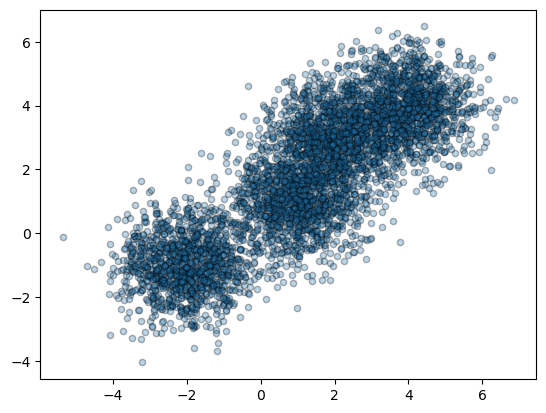

In [5]:
plt.scatter(x[:,0],x[:,1],marker='.',alpha=0.3,ec='k',s=80)

In [6]:
k_means=KMeans(init='k-means++',n_clusters=4,n_init=12)
k_means


KMeans(n_clusters=4, n_init=12)

In [7]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [8]:
k_means_labels=k_means.labels_
k_means_labels

array([1, 0, 0, ..., 3, 1, 1], shape=(5000,), dtype=int32)

In [9]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.98885963,  3.05841967],
       [-2.04402879, -1.00446255],
       [ 0.92483395,  0.88757552],
       [ 4.11301604,  4.02623931]])

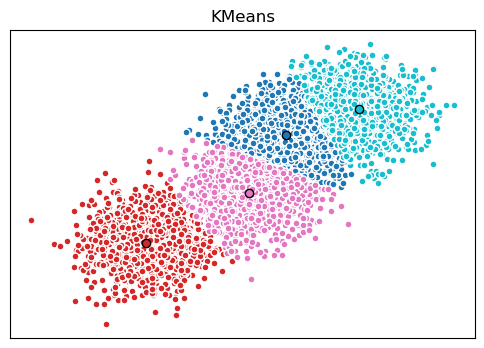

In [10]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
